In [37]:
import numpy as np
import pandas as pd

In [38]:
df = pd.read_csv('Admission_Predict2.csv')

In [39]:
df.shape

(500, 9)

In [40]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [41]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [42]:
df.drop(columns = ['Serial No.'] , inplace = True)

In [43]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [44]:
df.duplicated().sum()

0

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

In [47]:
x.shape , y.shape

((500, 7), (500,))

In [48]:
x_train ,x_test , y_train , y_test = train_test_split(x ,y , test_size = 0.2 , random_state = 30)

In [49]:
x_train.shape

(400, 7)

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [51]:
x_train_scaled

array([[0.4       , 0.39285714, 0.25      , ..., 0.375     , 0.46153846,
        0.        ],
       [0.28      , 0.39285714, 1.        , ..., 0.5       , 0.35897436,
        0.        ],
       [0.7       , 0.64285714, 0.25      , ..., 0.375     , 0.62820513,
        1.        ],
       ...,
       [1.        , 0.82142857, 1.        , ..., 0.875     , 0.72435897,
        1.        ],
       [0.62      , 0.71428571, 0.5       , ..., 0.875     , 0.68910256,
        1.        ],
       [0.44      , 0.21428571, 0.        , ..., 0.5       , 0.44230769,
        1.        ]])

In [52]:
from keras.layers import Dense
from keras import Sequential

In [53]:
model = Sequential()

model.add(Dense(10 , activation = 'relu' , input_dim = 7))
model.add(Dense(20 , activation = 'relu'))
model.add(Dense(1 , activation = 'linear'))

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                80        
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
model.compile(loss = 'mean_squared_error' , optimizer = 'Adam' , metrics = ['accuracy'])

In [56]:
history = model.fit(x_train_scaled , y_train , epochs = 100 , validation_split = 0.2)

Epoch 1/100
10/10 [==============================] - 1s 14ms/step - loss: 0.1914 - accuracy: 0.0000e+00 - val_loss: 0.1322 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0895 - accuracy: 0.0000e+00 - val_loss: 0.0638 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.0000e+00 - val_loss: 0.0460 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.0000e+00 - val_loss: 0.0398 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.0000e+00 - val_loss: 0.0326 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.0000e+00 - val_loss: 0.0288 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.0000e+00 - 

In [57]:
y_pred = model.predict(x_test_scaled)

4/4 [==============================] - 0s 0s/step


In [58]:
from sklearn.metrics import r2_score
r2_score(y_test , y_pred)

0.7931350343495567

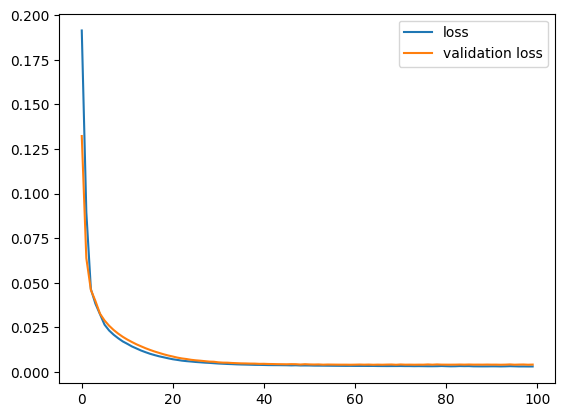

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'] , label = 'loss')
plt.plot(history.history['val_loss'] , label = 'validation loss')
plt.legend()